In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [7]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(data)
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [12]:
X = np.array(data)
Y = np.array(labels)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [14]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

In [15]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

2024-02-23 20:35:53.451559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 20:35:53.451642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 20:35:53.452617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [17]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=6)

Epoch 1/6
170/170 [==============================] - 49s 281ms/step - loss: 0.4339 - acc: 0.8126 - val_loss: 0.3317 - val_acc: 0.8727
Epoch 2/6
170/170 [==============================] - 46s 268ms/step - loss: 0.2878 - acc: 0.8854 - val_loss: 0.2202 - val_acc: 0.9140
Epoch 3/6
170/170 [==============================] - 47s 274ms/step - loss: 0.2383 - acc: 0.9066 - val_loss: 0.1945 - val_acc: 0.9289
Epoch 4/6
170/170 [==============================] - 48s 281ms/step - loss: 0.1926 - acc: 0.9272 - val_loss: 0.1616 - val_acc: 0.9372
Epoch 5/6
170/170 [==============================] - 47s 275ms/step - loss: 0.1548 - acc: 0.9391 - val_loss: 0.1720 - val_acc: 0.9438
Epoch 6/6
170/170 [==============================] - 47s 275ms/step - loss: 0.1453 - acc: 0.9437 - val_loss: 0.1606 - val_acc: 0.9455


In [18]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 4s 76ms/step - loss: 0.2372 - acc: 0.9305
Test Accuracy = 0.9305095672607422


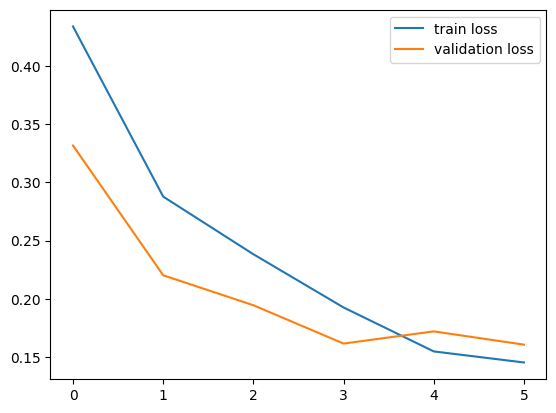

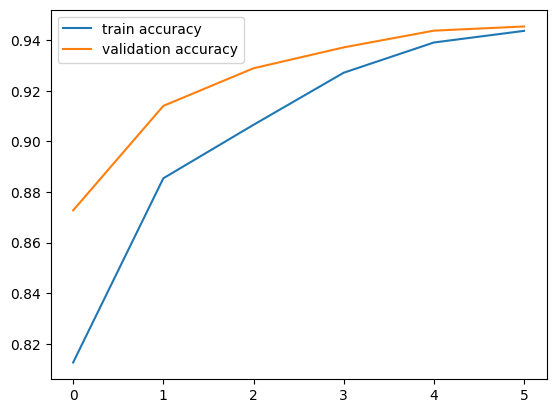

In [19]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [20]:
import cv2
import numpy as np
input_image_path = "/kaggle/input/test-for-face/African%2520businesswoman%2520with%2520face%2520mask%2520in%2520office.jpeg"

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

1/1 [==============================] - 0s 105ms/step
[[0.3394712 0.6085369]]
1
The person in the image is wearing a mask


In [ ]:
model.save("model.h5")